# Movie Box Office Predictor

## Data Cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
#import dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df1 = pd.read_csv('bom.movie_gross.csv.gz', index_col = 0)
df2 = pd.read_csv('imdb.name.basics.csv.gz', index_col = 0)
df3 = pd.read_csv('imdb.title.akas.csv.gz', index_col = 0)
df4 = pd.read_csv('imdb.title.basics.csv.gz', index_col = 0)
df5 = pd.read_csv('imdb.title.crew.csv.gz', index_col = 0)
df6 = pd.read_csv('imdb.title.principals.csv.gz', index_col = 0)
df7 = pd.read_csv('imdb.title.ratings.csv.gz', index_col = 0)
df8 = pd.read_csv('rt.movie_info.tsv.gz', sep='\t', index_col = 0)
df9 = pd.read_csv('tmdb.movies.csv.gz', index_col = 0)
df10 = pd.read_csv('tn.movie_budgets.csv.gz', index_col = 0)

In [3]:
df1.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
df2.head(250)

,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445"
nm0063198,Bayou,NaN,NaN,actor,"tt6579724,tt0093116"
nm0063432,Stevie Be-Zet,NaN,NaN,"composer,soundtrack","tt3106212,tt0478239,tt0264917,tt1626606"
nm0063618,Jeff Beal,1963.0,NaN,"composer,music_department,soundtrack","tt0183659,tt2545118,tt0384766,tt1856010"


In [5]:
df3.head()

,ordering,title,region,language,types,attributes,is_original_title
title_id,,,,,,,
tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [6]:
df4.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
df5.head()

,directors,writers
tconst,,
tt0285252,nm0899854,nm0899854
tt0438973,NaN,"nm0175726,nm1802864"
tt0462036,nm1940585,nm1940585
tt0835418,nm0151540,"nm0310087,nm0841532"
tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [8]:
df6.head()

,ordering,nconst,category,job,characters
tconst,,,,,
tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
tt0111414,2,nm0398271,director,NaN,NaN
tt0111414,3,nm3739909,producer,producer,NaN
tt0323808,10,nm0059247,editor,NaN,NaN
tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [9]:
df7.head()

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [10]:
df8.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [11]:
df9.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [12]:
df10.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [14]:
#in df10, create net profit column by subtracting production budget from worldwide gross. First, have to change datatypes to integer
df10['worldwide_gross'] = df10['worldwide_gross'].replace('[\$,]', '', regex=True).astype(int)
df10['domestic_gross'] = df10['domestic_gross'].replace('[\$,]', '', regex=True).astype(int)
df10['production_budget'] = df10['production_budget'].replace('[\$,]', '', regex=True).astype(int)

In [15]:
#rename 'primary_title' in df4 to 'movie' so that can merge it with df10
df4.rename(columns={'primary_title': 'movie'}, inplace=True)

## Feature Engineering

In [16]:
#in df10, create net profit column by subtracting production budget from worldwide gross 
df10['net_profit'] = df10['worldwide_gross'] - df10['production_budget']

In [17]:
df10.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [18]:
df10['date'] = pd.to_datetime(df10['release_date'])
df10['year'], df10['month'] = df10['date'].dt.year, df10['date'].dt.month
df10.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,date,year,month
id,,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009-12-18,2009,12
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011-05-20,2011,5
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019-06-07,2019,6
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015-05-01,2015,5
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017-12-15,2017,12


In [19]:
del df10['date']

In [20]:
df10 = df10[['release_date', 'year', 'month', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross',
            'net_profit']]

In [21]:
df10.head()

,release_date,year,month,movie,production_budget,domestic_gross,worldwide_gross,net_profit
id,,,,,,,,
1,"Dec 18, 2009",2009,12,Avatar,425000000,760507625,2776345279,2351345279
2,"May 20, 2011",2011,5,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
3,"Jun 7, 2019",2019,6,Dark Phoenix,350000000,42762350,149762350,-200237650
4,"May 1, 2015",2015,5,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
5,"Dec 15, 2017",2017,12,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [22]:
df10 = df10.rename(columns={'year': 'start_year', 'month': 'release_month'})

In [23]:
df_movies = df10.merge(df4, on=['movie', 'start_year'])

In [24]:
df_movies.head()

,release_date,start_year,release_month,movie,production_budget,domestic_gross,worldwide_gross,net_profit,original_title,runtime_minutes,genres
0,"May 20, 2011",2011,5,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy"
1,"Jun 7, 2019",2019,6,Dark Phoenix,350000000,42762350,149762350,-200237650,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi"
2,"May 1, 2015",2015,5,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi"
3,"Apr 27, 2018",2018,4,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi"
4,"Nov 17, 2017",2017,11,Justice League,300000000,229024295,655945209,355945209,Justice League,120.0,"Action,Adventure,Fantasy"


In [25]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   start_year         5782 non-null   int64 
 2   release_month      5782 non-null   int64 
 3   movie              5782 non-null   object
 4   production_budget  5782 non-null   int64 
 5   domestic_gross     5782 non-null   int64 
 6   worldwide_gross    5782 non-null   int64 
 7   net_profit         5782 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 406.5+ KB


In [26]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 0 to 1546
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       1547 non-null   object 
 1   start_year         1547 non-null   int64  
 2   release_month      1547 non-null   int64  
 3   movie              1547 non-null   object 
 4   production_budget  1547 non-null   int64  
 5   domestic_gross     1547 non-null   int64  
 6   worldwide_gross    1547 non-null   int64  
 7   net_profit         1547 non-null   int64  
 8   original_title     1547 non-null   object 
 9   runtime_minutes    1521 non-null   float64
 10  genres             1541 non-null   object 
dtypes: float64(1), int64(6), object(4)
memory usage: 145.0+ KB


In [27]:
df_movies['production_budget_millions'] = df_movies['production_budget']/1000000
df_movies['domestic_gross_millions'] = df_movies['domestic_gross']/1000000
df_movies['worldwide_gross_millions'] = df_movies['worldwide_gross']/1000000
df_movies['net_profit_millions'] = df_movies['net_profit']/1000000

In [28]:
df_movies.head()

,release_date,start_year,release_month,movie,production_budget,domestic_gross,worldwide_gross,net_profit,original_title,runtime_minutes,genres,production_budget_millions,domestic_gross_millions,worldwide_gross_millions,net_profit_millions
0,"May 20, 2011",2011,5,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",410.6,241.063875,1045.663875,635.063875
1,"Jun 7, 2019",2019,6,Dark Phoenix,350000000,42762350,149762350,-200237650,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",350.0,42.762350,149.762350,-200.237650
2,"May 1, 2015",2015,5,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",330.6,459.005868,1403.013963,1072.413963
3,"Apr 27, 2018",2018,4,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",300.0,678.815482,2048.134200,1748.134200
4,"Nov 17, 2017",2017,11,Justice League,300000000,229024295,655945209,355945209,Justice League,120.0,"Action,Adventure,Fantasy",300.0,229.024295,655.945209,355.945209


In [29]:
pd.options.display.float_format = "{:,.1f}".format

In [30]:
df_movies.head()

,release_date,start_year,release_month,movie,production_budget,domestic_gross,worldwide_gross,net_profit,original_title,runtime_minutes,genres,production_budget_millions,domestic_gross_millions,worldwide_gross_millions,net_profit_millions
0,"May 20, 2011",2011,5,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",410.6,241.1,"1,045.7",635.1
1,"Jun 7, 2019",2019,6,Dark Phoenix,350000000,42762350,149762350,-200237650,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",350.0,42.8,149.8,-200.2
2,"May 1, 2015",2015,5,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",330.6,459.0,"1,403.0","1,072.4"
3,"Apr 27, 2018",2018,4,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",300.0,678.8,"2,048.1","1,748.1"
4,"Nov 17, 2017",2017,11,Justice League,300000000,229024295,655945209,355945209,Justice League,120.0,"Action,Adventure,Fantasy",300.0,229.0,655.9,355.9


In [31]:
del df_movies['production_budget']
del df_movies['domestic_gross']
del df_movies['worldwide_gross']
del df_movies['net_profit']
del df_movies['original_title']

In [32]:
df_movies.head()

,release_date,start_year,release_month,movie,runtime_minutes,genres,production_budget_millions,domestic_gross_millions,worldwide_gross_millions,net_profit_millions
0,"May 20, 2011",2011,5,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",410.6,241.1,"1,045.7",635.1
1,"Jun 7, 2019",2019,6,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",350.0,42.8,149.8,-200.2
2,"May 1, 2015",2015,5,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",330.6,459.0,"1,403.0","1,072.4"
3,"Apr 27, 2018",2018,4,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",300.0,678.8,"2,048.1","1,748.1"
4,"Nov 17, 2017",2017,11,Justice League,120.0,"Action,Adventure,Fantasy",300.0,229.0,655.9,355.9


## EDA

In [34]:
df_movies['worldwide_gross_millions'].groupby(df_movies['release_month']).describe()

,count,mean,std,min,25%,50%,75%,max
release_month,,,,,,,,
1,70.0,81.0,82.5,0.0,31.5,56.2,103.6,517.6
2,93.0,138.5,192.7,0.0,27.7,65.5,175.4,"1,348.3"
3,133.0,170.3,251.6,0.0,13.2,73.8,197.7,"1,259.2"
4,103.0,145.0,304.9,0.0,10.7,49.0,105.3,"2,048.1"
5,103.0,237.7,326.2,0.0,10.7,84.2,332.6,"1,517.9"
6,123.0,223.4,333.2,0.0,8.4,65.3,317.7,"1,648.9"
7,128.0,187.8,251.6,0.0,14.5,91.1,244.8,"1,160.3"
8,126.0,90.3,131.8,0.0,7.2,48.7,103.6,770.9
9,151.0,64.9,100.7,0.0,3.1,30.2,82.9,697.5


In [44]:
result = df_movies['worldwide_gross_millions'].groupby(df_movies['release_month']).mean()

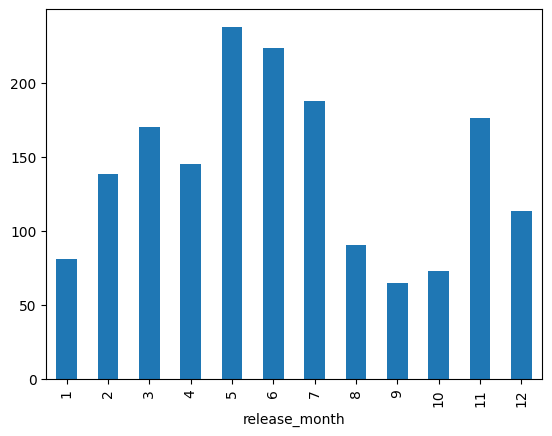

In [48]:
df_movies['worldwide_gross_millions'].groupby(df_movies['release_month']).mean().plot(kind='bar')

In [ ]:
dddddd

In [ ]:
#merge df10 and df4 and name the new dataframe 'df_movies'
#df_movies = pd.merge(df10, df4, on='movie')

In [ ]:
#df_movies.head()

In [ ]:
#see how many unique genres there are
#genre_counts = df_movies["genres"].value_counts()
#print(genre_counts)

In [ ]:
#Create Column to better define the different genres 
# create a list of our conditions
#conditions = [
#    (df_movies['genres'] == 'Drama'),
#    (df_movies['genres'] == 'Documentary'),
#    (df_movies['genres'] == 'Comedy'),
#    (df_movies['genres'] == 'Comedy,Drama'),
#    (df_movies['genres'] == 'Horror'),
#    (df_movies['genres'] == 'Drama,Romance'),
#    (df_movies['genres'] == 'Comedy,Drama,Romance'),
#    (df_movies['genres'] == 'Thriller'),
#    (df_movies['genres'] == 'Adventure,Animation,Comedy'),
#    (df_movies['genres'] == 'Drama,Thriller'),
#    (df_movies['genres'] == 'Action,Crime,Drama'),
#    (df_movies['genres'] == 'Comedy,Romance'),
#    (df_movies['genres'] == 'Action,Adventure,Sci-Fi'),
#    (df_movies['genres'] == 'Horror,Thriller'),
#    (df_movies['genres'] == 'Horror,Mystery,Thriller'),
#    (df_movies['genres'] == 'Action'),
#    (df_movies['genres'] == 'Action,Adventure,Fantasy'),
#    (df_movies['genres'] == 'Crime,Drama,Thriller'),
#    (df_movies['genres'] == 'Action,Comedy,Crime'),
#    (df_movies['genres'] == 'Action,Adventure,Drama'),
#    (df_movies['genres'] == 'Action,Adventure,Comedy'),
#    
#    
#]
#
## create a list of the values we want to assign for each condition
#values = ['Drama', 'Documentary', 'Comedy', 'Dramedy', 'Horror', 'Romantic', 'Romantic Comedy', 'Thriller',
#         'Animated Comedy', 'Thriller', 'Crime', 'Romantic Comedy', 'Sci-Fi', 'Horror Thriller', 'Horror Thriller',
#         'Action', 'Action Fantasy', 'Crime Thriller', 'Action Comedy', 'Action', 'Action Comedy',]
#
## create a new column and use np.select to assign values to it using our lists as arguments
#df_movies['Genre'] = np.select(conditions, values)
#
## display updated DataFrame
#df_movies.head(25)

In [ ]:
#Create Column to better define the different genres 
# create a list of our conditions
#conditions = [
#    #(df_movies['genres'] == 'Drama'),
#    #(df_movies['genres'] == 'Documentary'),
#    #(df_movies['genres'] == 'Comedy'),
#    #(df_movies['genres'] == 'Comedy,Drama'),
#    #(df_movies['genres'] == 'Horror'),
#    #(df_movies['genres'] == 'Drama,Romance'),
#    #(df_movies['genres'] == 'Comedy,Drama,Romance'),
#    #(df_movies['genres'] == 'Thriller'),
#    #(df_movies['genres'] == 'Adventure,Animation,Comedy'),
#    
#    (df_movies['genres'] == 'Crime,Drama'),
#    (df_movies['genres'] == 'Action,Adventure,Comedy'),
#    (df_movies['genres'] == 'Action,Thriller'),
#    (df_movies['genres'] == 'Action,Crime,Thriller'),
#    (df_movies['genres'] == 'Drama,Mystery,Thriller'),
#    (df_movies['genres'] == 'Action,Drama,Thriller'),
#    (df_movies['genres'] == 'Biography,Drama,History'),
#    (df_movies['genres'] == 'Biography,Documentary'),
#    (df_movies['genres'] == 'Drama,Horror,Mystery'),
#    (df_movies['genres'] == 'Biography,Drama'),
#    (df_movies['genres'] == 'Comedy,Crime,Drama'),
#    (df_movies['genres'] == 'Crime,Drama,Mystery '),
#    (df_movies['genres'] == 'Biography,Comedy,Drama'),
#    (df_movies['genres'] == 'Sci-Fi'),
#    (df_movies['genres'] == 'Documentary,Family'),
#    (df_movies['genres'] == 'Drama,Family'),
#    (df_movies['genres'] == 'Drama,Horror,Thriller'),
#    (df_movies['genres'] == 'Crime,Thriller'),
#    (df_movies['genres'] == 'Adventure,Family,Fantasy '),
#    (df_movies['genres'] == 'Romance'),
#    (df_movies['genres'] == 'Drama,Music'),
#    (df_movies['genres'] == 'Documentary,Drama'),
#    (df_movies['genres'] == 'Comedy,Drama,Family '),
#    (df_movies['genres'] == 'Biography,Crime,Drama'),
#]
#    
#     
#
## create a list of the values we want to assign for each condition
#values = ['Drama', 'Documentary', 'Comedy', 'Dramedy', 'Horror', 'Romantic', 'Romantic Comedy', 'Thriller',
#         'Animated Comedy', 'Crime', 'Thriller', 'Romantic Comedy', 'Sci-Fi', 'Horror Thriller', 'Horror Thriller',
#          'Action', 'Action Fantasy', 'Crime Thriller', 'Action Comedy', 'Action', 'Crime', 'Action Comedy',
#         'Thriller', 'Crime Thriller', 'Mystery Thriller', 'Thriller', 'Biographical Drama', 'Documentary', 
#          'Horror', 'Biographical Drama', 'Crime Dramedy', 'Crime Mystery', 'Biographical Dramedy', 'Sci-Fi',
#          'Documentary', 'Family', 'Horror Thriller', 'Crime Thriller', 'Fantasy Family', 'Romantic', 'Animated',
#         'Music Drama', 'Documentary', 'Family', 'Biographical Crime']
#
## create a new column and use np.select to assign values to it using our lists as arguments
#df_movies['Genre'] = np.select(conditions, values)
#
## display updated DataFrame
#df_movies.head()